In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def analyze_tasks(app_name, droidagent_result_dir):
    task_row = []
    with open(os.path.join(droidagent_result_dir, 'exp_data.json')) as f:
        exp_data = json.load(f)

    task_results = exp_data['task_results']
    for task, task_data in task_results.items():
        num_actions = 0
        for entry in task_data['task_execution_history']:
            if entry['type'] == 'ACTION' and entry['action_data'] is not None:
                num_actions += 1

        task_row.append({
            'app_name': app_name,
            'task': task,
            'success': task_data['result'] == 'SUCCESS',
            'num_actions': num_actions,
            'num_critiques': task_data['num_critiques'],
            'num_visited_pages': len(task_data['visited_pages_during_task']),
        })

    return task_row


In [3]:
task_rows = []
for app_name in os.listdir('../data/'):
    if app_name == "QuickChat":
        continue
    if app_name == '.keep':
        continue
    if app_name == '.DS_Store':
        continue

    result_path = os.path.join('../data/', app_name)

    task_row = analyze_tasks(app_name, result_path)
    task_rows.extend(task_row)

task_df = pd.DataFrame(task_rows)


In [4]:
task_df

,app_name,task,success,num_actions,num_critiques,num_visited_pages
0,Phonograph,"Complete the AppIntro by clicking on the ""GET ...",True,1,0,2
1,Phonograph,Start playing a song from the song list.,True,1,0,1
2,Phonograph,Explore the album details by selecting an albu...,True,4,1,2
3,Phonograph,Edit the tags of the current album on the Albu...,True,13,3,3
4,Phonograph,Set a sleep timer for the current playing album.,True,4,1,1
...,...,...,...,...,...,...
542,Omni-Notes,Set a password for the notes to secure them.,False,13,3,1
543,Omni-Notes,Navigate to the Gallery page to view attached ...,False,13,3,1
544,Omni-Notes,"Add a new tag ""Study Material"" to the note tit...",False,13,3,1
545,Omni-Notes,"Add a new tag ""CS Studies"" to the note titled ...",False,13,3,1


In [5]:
# Draw stacked bar chart about number of succeeded tasks and number of failed tasks

task_df['task_count'] = 1
task_df_agg = task_df.groupby(['app_name']).sum()
task_df_agg = task_df_agg.reset_index()
task_df_agg['num_success'] = task_df_agg['success']
task_df_agg['num_failed'] = task_df_agg['task_count'] - task_df_agg['success']
task_df_agg = task_df_agg[['app_name', 'num_success', 'num_failed', 'task_count']]
task_df_agg

,app_name,num_success,num_failed,task_count
0,APhotoManager,15,26,41
1,ActivityDiary,25,13,38
2,AnkiDroid,26,18,44
3,AntennaPod,29,16,45
4,Markor,12,16,28
5,MaterialFB,9,15,24
6,MyExpenses,21,21,42
7,Omni-Notes,10,24,34
8,OpenTracks,31,7,38
9,Phonograph,16,17,33


In [6]:
task_df_agg.describe()

,num_success,num_failed,task_count
count,15.000000,15.000000,15.000000
mean,18.466667,18.000000,36.466667
std,8.166715,5.154748,8.790146
min,7.000000,7.000000,20.000000
25%,11.000000,15.500000,31.500000
50%,16.000000,18.000000,38.000000
75%,25.500000,21.000000,43.000000
max,31.000000,26.000000,53.000000


In [7]:
# add total row (app name: total)
total_row = task_df_agg[['num_success', 'num_failed', 'task_count']].sum()
total_row['app_name'] = 'total'

task_df_agg = pd.concat([task_df_agg, pd.DataFrame([total_row])])
task_df_agg['success_rate'] = task_df_agg['num_success'] / task_df_agg['task_count']
task_df_agg.round(2)

,app_name,num_success,num_failed,task_count,success_rate
0,APhotoManager,15,26,41,0.37
1,ActivityDiary,25,13,38,0.66
2,AnkiDroid,26,18,44,0.59
3,AntennaPod,29,16,45,0.64
4,Markor,12,16,28,0.43
5,MaterialFB,9,15,24,0.38
6,MyExpenses,21,21,42,0.50
7,Omni-Notes,10,24,34,0.29
8,OpenTracks,31,7,38,0.82
9,Phonograph,16,17,33,0.48


In [8]:
task_df_agg = task_df_agg.sort_values(by='task_count', ascending=False)
task_df_agg

,app_name,num_success,num_failed,task_count,success_rate
0,total,277,270,547,0.506399
11,collect,27,26,53,0.509434
3,AntennaPod,29,16,45,0.644444
2,AnkiDroid,26,18,44,0.590909
14,osmeditor4android,25,19,44,0.568182
6,MyExpenses,21,21,42,0.500000
0,APhotoManager,15,26,41,0.365854
1,ActivityDiary,25,13,38,0.657895
8,OpenTracks,31,7,38,0.815789
7,Omni-Notes,10,24,34,0.294118


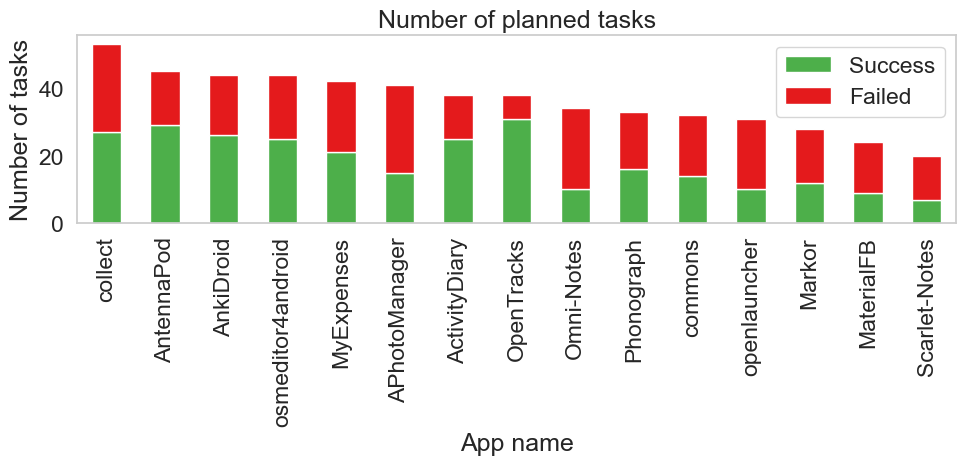

In [9]:
# Draw seaborn stacked bar chart about number of succeeded tasks and number of failed tasks

# save the plot
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

# sort by number of tasks
task_df_agg = task_df_agg.sort_values(by='task_count', ascending=False)

ax = task_df_agg[task_df_agg['app_name'] != 'total'].plot(kind='bar', x='app_name', y=['num_success', 'num_failed'], stacked=True, figsize=(10, 5), color=['#4daf4a', '#e41a1c'])

# change legend names 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Success', 'Failed'], loc='upper right')


plt.title('Number of planned tasks')
plt.xlabel('App name')
plt.ylabel('Number of tasks')
plt.tight_layout()
plt.savefig('/Users/greenmon/Dropbox/COINSE/#DroidAgent/DroidAgent_ICST_2024/figures/RQ2_num_tasks.pdf')

In [10]:
app_results = task_df.groupby('app_name')[['success', 'num_actions', 'num_critiques', 'num_visited_pages']].mean()

# round to 2 decimal places in python pandas
app_results.round(2)

,success,num_actions,num_critiques,num_visited_pages
app_name,,,,
APhotoManager,0.37,8.49,1.80,1.44
ActivityDiary,0.66,8.34,1.66,1.79
AnkiDroid,0.59,9.43,1.98,2.16
AntennaPod,0.64,7.36,1.49,1.18
Markor,0.43,9.11,1.86,1.29
MaterialFB,0.38,10.33,2.21,1.25
MyExpenses,0.50,8.52,1.76,2.43
Omni-Notes,0.29,8.65,1.79,1.32
OpenTracks,0.82,7.55,1.42,2.76


In [11]:
task_df_agg = task_df.groupby(['app_name']).sum()
task_df_agg = task_df_agg.reset_index()

# get summary statistics
task_df_agg.describe()

,success,num_actions,num_critiques,num_visited_pages,task_count
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,18.466667,316.733333,68.066667,64.800000,36.466667
std,8.166715,58.466678,16.816092,27.347499,8.790146
min,7.000000,216.000000,49.000000,30.000000,20.000000
25%,11.000000,279.000000,55.000000,42.000000,31.500000
50%,16.000000,317.000000,63.000000,62.000000,38.000000
75%,25.500000,353.000000,75.000000,82.500000,43.000000
max,31.000000,415.000000,113.000000,112.000000,53.000000


In [12]:
task_df.groupby(['app_name'])[['success', 'num_actions', 'num_critiques', 'num_visited_pages']].mean().describe()

,success,num_actions,num_critiques,num_visited_pages
count,15.000000,15.000000,15.000000,15.000000
mean,0.489675,8.868003,1.899351,1.738404
std,0.145441,1.138554,0.324218,0.478024
min,0.294118,7.355556,1.421053,1.177778
25%,0.370427,8.307416,1.738636,1.304622
50%,0.484848,8.523810,1.804878,1.650000
75%,0.579545,9.269481,2.054674,2.040979
max,0.815789,11.225806,2.580645,2.763158


/var/folders/nn/kfc9twsx3kq0b3xmpb25k5w40000gn/T/ipykernel_12902/3159017908.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='app_name', y='task_count', data=task_df.groupby('app_name').sum().reset_index(), palette='Set2')
/var/folders/nn/kfc9twsx3kq0b3xmpb25k5w40000gn/T/ipykernel_12902/3159017908.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='App ID', y='num_actions', data=task_df, palette='Set2')
/var/folders/nn/kfc9twsx3kq0b3xmpb25k5w40000gn/T/ipykernel_12902/3159017908.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklab

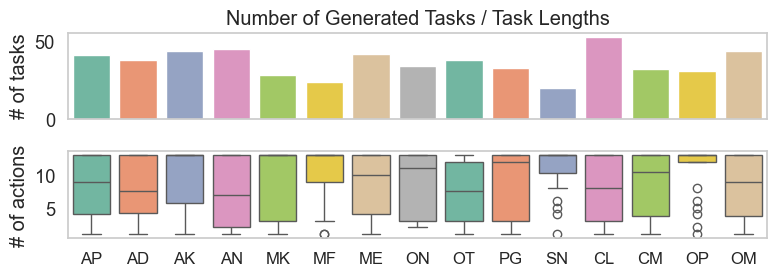

In [13]:
app_name_map = {
    "ActivityDiary": "AD",
    "AnkiDroid": "AK",
    "AntennaPod": "AN",
    "Markor": "MK",
    "Omni-Notes": "ON",
    "Phonograph": "PG",
    "Scarlet-Notes": "SN",
    "commons": "CM",
    "openlauncher": "OP",
    "osmeditor4android": "OM",
    "MaterialFB": "MF",
    "collect": "CL",
    "APhotoManager": "AP",
    "MyExpenses": "ME",
    "OpenTracks": "OT"
}

sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'axes.grid' : False})

# initialize figure 
fig, axes = plt.subplots(2, 1, figsize=(8, 3), sharex=False)

task_df = task_df.sort_values(by='app_name')

sns.barplot(ax=axes[0], x='app_name', y='task_count', data=task_df.groupby('app_name').sum().reset_index(), palette='Set2')
axes[0].set_xlabel('')
# hide xtickslabels
axes[0].set_xticklabels([])
axes[0].set_ylabel('# of tasks')
axes[0].set_title('Number of Generated Tasks / Task Lengths')

task_df['App ID'] = task_df['app_name'].apply(lambda x: app_name_map[x])
task_df.sort_values(by='app_name', inplace=True)

sns.boxplot(ax=axes[1], x='App ID', y='num_actions', data=task_df, palette='Set2')

# change x-axis label for the second subplot
axes[1].set_xlabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12)
axes[1].set_ylabel('# of actions')

plt.tight_layout()


plt.savefig('./figures/RQ2_task_quantitative.pdf')

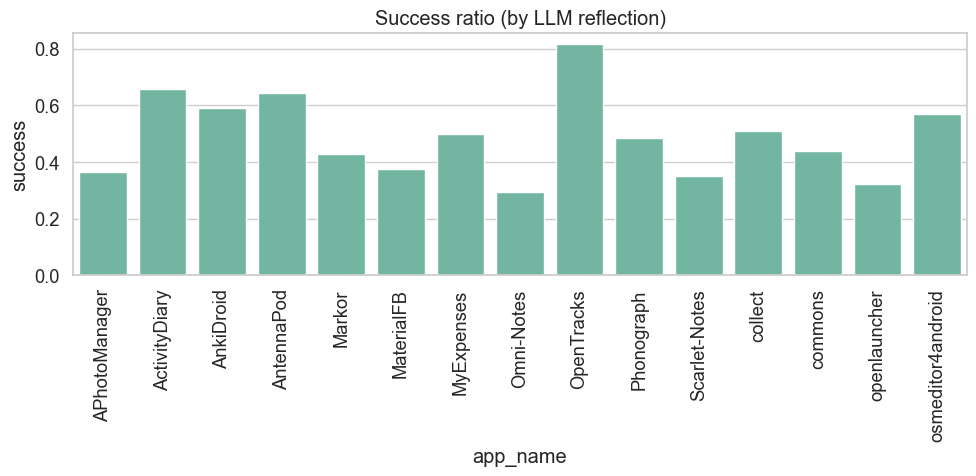

In [16]:
# seaborn barplot by app_name for success ratio 
app_results.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.title('Success ratio (by LLM reflection)')
# axis rotation
plt.xticks(rotation=90)
sns.set_palette("Set2")
sns.barplot(x=app_results['app_name'], y=app_results['success'])
plt.tight_layout()

plt.savefig('./figures/RQ2.1_success_ratio.png')

In [15]:
task_df.groupby('app_name')[['success', 'num_actions', 'num_critiques', 'num_visited_pages']].mean()

,success,num_actions,num_critiques,num_visited_pages
app_name,,,,
APhotoManager,0.365854,8.487805,1.804878,1.439024
ActivityDiary,0.657895,8.342105,1.657895,1.789474
AnkiDroid,0.590909,9.431818,1.977273,2.159091
AntennaPod,0.644444,7.355556,1.488889,1.177778
Markor,0.428571,9.107143,1.857143,1.285714
MaterialFB,0.375000,10.333333,2.208333,1.250000
MyExpenses,0.500000,8.523810,1.761905,2.428571
Omni-Notes,0.294118,8.647059,1.794118,1.323529
OpenTracks,0.815789,7.552632,1.421053,2.763158
